In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
trans_df = pd.read_csv('/Users/mehrnazuser/Documents/Lavoro/BlueRock Logistics/Data/Trans_BLR.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], sep =';')
trans_df.head()

,T_DOC_TYPE,T_DOC_ID,T_DOC_DATE,T_PLANNED_DATE,T_EFFECTIVE_DATE,T_DEL_LOC_ID,T_CARRIER_NAME,T_SENDING_ID,T_RECEIVING_ID,T_RTI_ID,T_RTI_NAME,T_ACT_HAND_IN_QTY,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE,T_STATUS
0,MVO,4203787,2014-07-07 12:21:01.000,2014-07-07 00:00:00.000,2014-07-07 12:24:57.000,NaN,Andersons,8716532102797,8716532103272,8716532000044,CC Container Post 180,0,500,500,NBRK,EFF
1,RET,4203205,2014-07-03 15:17:29.000,2014-07-07 00:00:00.000,2014-07-07 15:11:36.000,NaN,hbt,304430,8716532103527,8716532000044,CC Container Post 180,12,0,12,BRK,EFF
2,RET,4204273,2014-07-08 16:46:46.000,2014-07-11 00:00:00.000,NaN,NaN,NaN,300393,8716532103882,8716532000044,CC Container Post 180,0,0,172,COL,CAN
3,COL,4241637,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000112,CC Euro Container Base,0,60,60,COL,EFF
4,COL,4241637,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000143,CC Euro Container Post 170,0,240,240,COL,EFF


# Filters

### 1_ COL

In [3]:
trans_df = trans_df[trans_df['T_DOC_TYPE'] == 'COL']
trans_df = trans_df.drop(['T_ACT_HAND_IN_QTY', 'T_DOC_TYPE', 'T_DOC_ID'], axis = 1)
trans_df.head()

,T_DOC_DATE,T_PLANNED_DATE,T_EFFECTIVE_DATE,T_DEL_LOC_ID,T_CARRIER_NAME,T_SENDING_ID,T_RECEIVING_ID,T_RTI_ID,T_RTI_NAME,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE,T_STATUS
3,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000112,CC Euro Container Base,60,60,COL,EFF
4,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000143,CC Euro Container Post 170,240,240,COL,EFF
28,2014-07-08 12:07:11.000,2014-07-11 00:00:00.000,NaN,NaN,NaN,8716532101512,1000008192,8716532000303,CC Container Base,0,10,COL,CAN
29,2014-07-08 12:07:11.000,2014-07-11 00:00:00.000,NaN,NaN,NaN,8716532101512,1000008192,8716532000037,CC Container Shelf,0,30,COL,CAN
57,2014-07-10 12:44:11.000,2014-07-09 00:00:00.000,2014-07-09 00:00:00.000,NaN,NaN,8716532100492,303175,8716532000303,CC Container Base,4,4,COL,EFF


### 2_ Status = EFF

In [4]:
trans_df = trans_df[trans_df['T_STATUS '] == 'EFF']
trans_df = trans_df.drop('T_STATUS ', axis = 1)
trans_df.head()

,T_DOC_DATE,T_PLANNED_DATE,T_EFFECTIVE_DATE,T_DEL_LOC_ID,T_CARRIER_NAME,T_SENDING_ID,T_RECEIVING_ID,T_RTI_ID,T_RTI_NAME,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE
3,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000112,CC Euro Container Base,60,60,COL
4,2014-12-19 10:27:00.000,2014-12-22 00:00:00.000,2014-12-22 15:06:36.000,NaN,bama blomster,8716532103527,1000002583,8716532000143,CC Euro Container Post 170,240,240,COL
57,2014-07-10 12:44:11.000,2014-07-09 00:00:00.000,2014-07-09 00:00:00.000,NaN,NaN,8716532100492,303175,8716532000303,CC Container Base,4,4,COL
58,2014-07-10 12:44:11.000,2014-07-09 00:00:00.000,2014-07-09 00:00:00.000,NaN,NaN,8716532100492,303175,8716532000037,CC Container Shelf,30,30,COL
59,2014-07-07 08:30:58.000,2014-07-04 00:00:00.000,2014-07-04 00:00:00.000,NaN,NaN,8716532100492,311005,8716532000303,CC Container Base,4,4,COL


### 3_ RTI = CC Container Base

In [5]:
trans_df = trans_df[trans_df['T_RTI_NAME'] == 'CC Container Base']
trans_df = trans_df.drop(['T_RTI_NAME', 'T_RTI_ID'], axis = 1)
trans_df.head()

,T_DOC_DATE,T_PLANNED_DATE,T_EFFECTIVE_DATE,T_DEL_LOC_ID,T_CARRIER_NAME,T_SENDING_ID,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE
57,2014-07-10 12:44:11.000,2014-07-09 00:00:00.000,2014-07-09 00:00:00.000,NaN,NaN,8716532100492,303175,4,4,COL
59,2014-07-07 08:30:58.000,2014-07-04 00:00:00.000,2014-07-04 00:00:00.000,NaN,NaN,8716532100492,311005,4,4,COL
62,2014-07-14 09:05:13.000,2014-07-11 00:00:00.000,2014-07-11 00:00:00.000,NaN,NaN,8716532100492,304507,26,26,COL
64,2014-07-11 08:42:37.000,2014-07-10 00:00:00.000,2014-07-10 00:00:00.000,NaN,NaN,8716532100492,1000008605,45,45,COL
67,2014-12-08 13:49:40.000,2014-12-05 00:00:00.000,2014-12-05 00:00:00.000,NaN,NaN,8716532100492,1000001920,3,3,COL


### 4_ EFF-Date

In [6]:
trans_df = trans_df.drop(['T_DOC_DATE', 'T_PLANNED_DATE'], axis = 1)
trans_df['T_EFFECTIVE_DATE'] = pd.to_datetime(trans_df['T_EFFECTIVE_DATE'])
trans_df['Date'] = trans_df.apply(lambda r:r['T_EFFECTIVE_DATE'].date(), axis = 1)
trans_df = trans_df.drop('T_EFFECTIVE_DATE', axis = 1)


In [7]:
trans_df = trans_df.set_index('Date')
trans_df.head()

,T_DEL_LOC_ID,T_CARRIER_NAME,T_SENDING_ID,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE
Date,,,,,,,
2014-07-09,NaN,NaN,8716532100492,303175,4,4,COL
2014-07-04,NaN,NaN,8716532100492,311005,4,4,COL
2014-07-11,NaN,NaN,8716532100492,304507,26,26,COL
2014-07-10,NaN,NaN,8716532100492,1000008605,45,45,COL
2014-12-05,NaN,NaN,8716532100492,1000001920,3,3,COL


In [8]:
trans_df.to_excel(r'/Users/mehrnazuser/Google Drive/BlueRock-Mehrnaz/Code/2excel\my_dataset.xlsx', sheet_name = 'data')
#from pandas import ExcelWriter

#writer = ExcelWriter('PythonExport.xlsx')
#trans_df.to_excel(writer,'Sheet5')
#writer.save()

# DF TO CSV
#yourdf.to_csv('PythonExport.csv', sep=',')

#### is hand-out-qty = planned-qty ?

In [9]:
trans_df['T_ACT_HAND_OUT_QTY'].equals(trans_df['T_PLANNED_QTY'])

False

In [10]:
trans_df['T_CARRIER_NAME'].unique()

array([nan, 'florarbo', 'JESUS', ..., 'colour gro', 'cotrans', 'rzero'],
      dtype=object)

In [11]:
trans_df['T_CARRIER_NAME'].unique()

array([nan, 'florarbo', 'JESUS', ..., 'colour gro', 'cotrans', 'rzero'],
      dtype=object)

In [12]:
trans_df['T_SENDING_ID'].unique()

array([8716532100492, 8716532104165, 8716532102960, 8716532100218,
       8716532104018, 8716532103936, 8716532101581, 8716532101482,
       8716532101901, 8716532101864, 8716532100591, 8716532101932,
       8716532103394, 8716532104063, 8716532103272, 8716532103356,
       8716532101840, 8716532103363, 8716532102946, 8716532101710,
       8716532104141, 8716532103527, 8716532102489, 8716532103417,
       8716532103349, 8716532103868, 8716532102922, 8716532102953,
       8716532103950, 8716532103943, 8716532104193, 8716532103837,
       8716532102939, 8716532103974, 8716532102710, 8716532103034,
       8716532103462, 8716532100041, 8716532102665, 8716532104296,
       8716532104094, 8716532104265, 8716532104272, 8716532103689,
       8716532103589, 8716532103172, 8716532104179,  871653210105,
       8716532104189, 8716532103165, 8716532102886, 8716532102866,
       8716532103370, 8716532101512, 8716532104032, 8716532103141,
       8716532104186, 8716532100195, 8716532101611,  871653210

In [13]:
trans_df['T_RECEIVING_ID'].unique()

array([    303175,     311005,     304507, ..., 1000012804,     110949,
          3600182])

In [14]:
trans_df['T_RTI_STATE'].unique()

array(['COL', 'NBRK'], dtype=object)

### Depot Addresses

In [15]:
depot_add = pd.read_excel('/Users/mehrnazuser/Documents/Lavoro/BlueRock Logistics/Data/masterdata20190918.xlsx', sheet_name = 'Depot Account_Addreses')
depot_add.head()

,tenant,account,owner,name,code,type,street1,street2,street3,postal code,city,state,country,lat,lng
0,cc,8716532102866,CC,A-Hörsching Schachinger,8716532102866,NORMAL,Logistikpark 1 / Rampe 28 29,NaN,NaN,4063,Hörsching,NaN,AT,48.236130,14.185373
1,cc,8716532105350,CC,B-Boutersem Transmet,8716532105350,NORMAL,Leuvensesteenweg 212,NaN,NaN,3370,Boutersem,NaN,BE,50.835482,4.848207
2,cc,8716532104230,CC,B-Kampenhout Rotra,8716532104230,NORMAL,Mechelsesteenweg 4,NaN,NaN,1910,Kampenhout,NaN,BE,50.935793,4.560526
3,cc,8716532104469,CC,B-Lokeren MSI,8716532104469,NORMAL,Zoomstraat 5,NaN,NaN,9160,Lokeren,NaN,BE,51.095057,4.022585
4,cc,8716532102710,CC,CH-Wangen an der Aare Transportgemeinschaft,8716532102710,NORMAL,Rutifeldstrasse 1 / Industrie Rutifeld,NaN,NaN,3380,Wangen an der Aare,NaN,CH,47.232559,7.650727


### Join Address & Trans

In [16]:
trans_full = trans_df.join(depot_add.set_index('code'), on = 'T_SENDING_ID')
trans_full = trans_full.drop('T_SENDING_ID', axis =1)
trans_full.head()

,T_DEL_LOC_ID,T_CARRIER_NAME,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE,tenant,account,owner,name,type,street1,street2,street3,postal code,city,state,country,lat,lng
Date,,,,,,,,,,,,,,,,,,,,
2014-07-09,NaN,NaN,303175,4,4,COL,cc,8.716532e+12,CC,NL-Bleiswijk Bloemenveiling Holland,NORMAL,Klappolder 130 Hal e - Box nrs. 84 t/m 88,NaN,NaN,2665 ZM,Bleiswijk,NaN,NL,52.009679,4.542596
2014-07-04,NaN,NaN,311005,4,4,COL,cc,8.716532e+12,CC,NL-Bleiswijk Bloemenveiling Holland,NORMAL,Klappolder 130 Hal e - Box nrs. 84 t/m 88,NaN,NaN,2665 ZM,Bleiswijk,NaN,NL,52.009679,4.542596
2014-07-11,NaN,NaN,304507,26,26,COL,cc,8.716532e+12,CC,NL-Bleiswijk Bloemenveiling Holland,NORMAL,Klappolder 130 Hal e - Box nrs. 84 t/m 88,NaN,NaN,2665 ZM,Bleiswijk,NaN,NL,52.009679,4.542596
2014-07-10,NaN,NaN,1000008605,45,45,COL,cc,8.716532e+12,CC,NL-Bleiswijk Bloemenveiling Holland,NORMAL,Klappolder 130 Hal e - Box nrs. 84 t/m 88,NaN,NaN,2665 ZM,Bleiswijk,NaN,NL,52.009679,4.542596
2014-12-05,NaN,NaN,1000001920,3,3,COL,cc,8.716532e+12,CC,NL-Bleiswijk Bloemenveiling Holland,NORMAL,Klappolder 130 Hal e - Box nrs. 84 t/m 88,NaN,NaN,2665 ZM,Bleiswijk,NaN,NL,52.009679,4.542596


### Let's keep only IT...

In [17]:
trans_full = trans_full[trans_full['country'] == 'IT']
trans_full.head()

,T_DEL_LOC_ID,T_CARRIER_NAME,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE,tenant,account,owner,name,type,street1,street2,street3,postal code,city,state,country,lat,lng
Date,,,,,,,,,,,,,,,,,,,,
2014-11-24,NaN,NaN,503267,38,38,COL,cc,8.716532e+12,CC,I 47 Pescia Floratoscana,NORMAL,Via Caravaggio 21,NaN,NaN,51017,Pescia,PT,IT,43.872206,10.689310
2014-07-14,NaN,todisco,3810403,18,18,COL,cc,8.716532e+12,CC,I 35 Bari Capitanio,NORMAL,Contrada Conchia 298,NaN,NaN,70043,Monopoli,BA,IT,40.929167,17.304403
2014-12-04,NaN,sanguinetti,1000006138,71,500,NBRK,cc,8.716532e+12,CC,I 02 Albenga Ciesse,NORMAL,Via Benessea 24,NaN,NaN,17035,Cisano sul Neva,SV,IT,44.087068,8.143154
2014-07-15,NaN,pandozzi,502771,1,1,NBRK,cc,8.716532e+12,CC,I 48 Latina Floratoscana,NORMAL,S.R 148 Pontina km 74.600,NaN,NaN,04100,Borgo S. Michele,LT,IT,41.288218,13.207908
2014-07-07,NaN,altiflor,503349,22,22,NBRK,cc,8.716532e+12,CC,I 48 Latina Floratoscana,NORMAL,S.R 148 Pontina km 74.600,NaN,NaN,04100,Borgo S. Michele,LT,IT,41.288218,13.207908


In [18]:
trans_full['T_RECEIVING_ID'].nunique()

401

In [19]:
trans_full['name'].unique()

array(['I 47 Pescia Floratoscana', 'I 35 Bari Capitanio',
       'I 02 Albenga Ciesse', 'I 48 Latina Floratoscana',
       'I 03 Giarre Weistra HUB', 'I 43 Milano Alpetrans',
       'I 11 S.Benedetto Ciarrocchi', 'I 51 Marostica Alpetrans',
       'I 50 Padova Torello', 'I 52 Terme Consorzio', 'I 71 Albenga HUB',
       'I Sector Agri Repair Albenga',
       'I Castor Italy srl Albenga Repair'], dtype=object)

In [20]:
trans_full['lat'].nunique()

11

In [21]:
trans_full['lng'].nunique()

11

In [22]:
trans_full['postal code'].nunique()

11

In [23]:
trans_full['T_DEL_LOC_ID'].unique()

array([nan])

In [24]:
trans_full = trans_full.drop(['T_DEL_LOC_ID', 'country'], axis = 1)
trans_full.head()

,T_CARRIER_NAME,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,T_PLANNED_QTY,T_RTI_STATE,tenant,account,owner,name,type,street1,street2,street3,postal code,city,state,lat,lng
Date,,,,,,,,,,,,,,,,,,
2014-11-24,NaN,503267,38,38,COL,cc,8.716532e+12,CC,I 47 Pescia Floratoscana,NORMAL,Via Caravaggio 21,NaN,NaN,51017,Pescia,PT,43.872206,10.689310
2014-07-14,todisco,3810403,18,18,COL,cc,8.716532e+12,CC,I 35 Bari Capitanio,NORMAL,Contrada Conchia 298,NaN,NaN,70043,Monopoli,BA,40.929167,17.304403
2014-12-04,sanguinetti,1000006138,71,500,NBRK,cc,8.716532e+12,CC,I 02 Albenga Ciesse,NORMAL,Via Benessea 24,NaN,NaN,17035,Cisano sul Neva,SV,44.087068,8.143154
2014-07-15,pandozzi,502771,1,1,NBRK,cc,8.716532e+12,CC,I 48 Latina Floratoscana,NORMAL,S.R 148 Pontina km 74.600,NaN,NaN,04100,Borgo S. Michele,LT,41.288218,13.207908
2014-07-07,altiflor,503349,22,22,NBRK,cc,8.716532e+12,CC,I 48 Latina Floratoscana,NORMAL,S.R 148 Pontina km 74.600,NaN,NaN,04100,Borgo S. Michele,LT,41.288218,13.207908


In [25]:
trans_full = trans_full.drop('T_PLANNED_QTY', axis = 1)

In [26]:
trans_full = trans_full.groupby('name').sum()
trans_full.head()

,T_RECEIVING_ID,T_ACT_HAND_OUT_QTY,account,street2,street3,lat,lng
name,,,,,,,
I 02 Albenga Ciesse,268472554246,143470,1.086952e+16,0.0,0.0,54976.573796,10154.513038
I 03 Giarre Weistra HUB,128223497886,51412,5.186337e+14,0.0,0.0,22442.112420,9030.238245
I 11 S.Benedetto Ciarrocchi,28078833038,3665,8.193540e+13,0.0,0.0,4037.568464,1302.496900
I 35 Bari Capitanio,62089899805,30283,2.161700e+15,0.0,0.0,10150.433416,4291.491944
I 43 Milano Alpetrans,68061727974,24599,1.682291e+15,0.0,0.0,8748.848067,1764.049722


# Regression Analysis with StatsModel

In [27]:
import statsmodels.api as sm

In [28]:
XVar = trans_full.drop('T_ACT_HAND_OUT_QTY', axis = 1)
YVar = trans_full['T_ACT_HAND_OUT_QTY']
YVar.head()

name
I 02 Albenga Ciesse            143470
I 03 Giarre Weistra HUB         51412
I 11 S.Benedetto Ciarrocchi      3665
I 35 Bari Capitanio             30283
I 43 Milano Alpetrans           24599
Name: T_ACT_HAND_OUT_QTY, dtype: int64

In [29]:
XVar.head()

,T_RECEIVING_ID,account,street2,street3,lat,lng
name,,,,,,
I 02 Albenga Ciesse,268472554246,1.086952e+16,0.0,0.0,54976.573796,10154.513038
I 03 Giarre Weistra HUB,128223497886,5.186337e+14,0.0,0.0,22442.112420,9030.238245
I 11 S.Benedetto Ciarrocchi,28078833038,8.193540e+13,0.0,0.0,4037.568464,1302.496900
I 35 Bari Capitanio,62089899805,2.161700e+15,0.0,0.0,10150.433416,4291.491944
I 43 Milano Alpetrans,68061727974,1.682291e+15,0.0,0.0,8748.848067,1764.049722


In [30]:
linearModel = sm.OLS(YVar, XVar).fit()

In [31]:
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:     T_ACT_HAND_OUT_QTY   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           2.30e-07
Time:                        15:29:36   Log-Likelihood:                -131.88
No. Observations:                  13   AIC:                             271.8
Df Residuals:                       9   BIC:                             274.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
T_RECEIVING_ID  3.141e-07   5.84e-08      5.

In [32]:
XVar2 = sm.add_constant(XVar)

In [33]:
linearModel2 = sm.OLS(YVar, XVar2).fit()
print(linearModel2.summary())

                            OLS Regression Results                            
Dep. Variable:     T_ACT_HAND_OUT_QTY   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           2.30e-07
Time:                        15:29:36   Log-Likelihood:                -131.88
No. Observations:                  13   AIC:                             271.8
Df Residuals:                       9   BIC:                             274.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.019e-12   3.51e-11      0.

In [34]:
X_T_RECEIVING_ID = trans_full['T_RECEIVING_ID']

In [35]:
linearModel3 = sm.OLS(YVar, X_T_RECEIVING_ID).fit()
print(linearModel3.summary())

                                 OLS Regression Results                                
Dep. Variable:     T_ACT_HAND_OUT_QTY   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              314.7
Date:                Wed, 29 Jan 2020   Prob (F-statistic):                    5.63e-10
Time:                        15:29:36   Log-Likelihood:                         -136.67
No. Observations:                  13   AIC:                                      275.3
Df Residuals:                      12   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [36]:
X_sig = trans_full.drop(['T_ACT_HAND_OUT_QTY', 'street2', 'street3', 'lat', 'lng'], axis = 1)

In [37]:
linearModel4 = sm.OLS(YVar, X_sig).fit()
print(linearModel4.summary())

                            OLS Regression Results                            
Dep. Variable:     T_ACT_HAND_OUT_QTY   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     390.3
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           6.10e-10
Time:                        15:29:36   Log-Likelihood:                -131.94
No. Observations:                  13   AIC:                             267.9
Df Residuals:                      11   BIC:                             269.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
T_RECEIVING_ID  3.135e-07    5.3e-08      5.

# Linear Model

In [38]:
from sklearn import linear_model

In [39]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston()

In [40]:
X = trans_full.drop('T_ACT_HAND_OUT_QTY', axis = 1)
Y = trans_full['T_ACT_HAND_OUT_QTY']

In [41]:
lm = linear_model.LinearRegression()
model = lm.fit(X_sig,Y)

### Predictions

In [42]:
predictions = lm.predict(X_sig)
print(predictions)

[141537.72557248  43730.18793419   7758.38581351  29381.26521891
  29064.79745539  15039.26837507  43202.23893763   1168.76364946
  11336.84364878   -644.89654435  40778.84358852  -1622.21182479
  -1622.21182479]


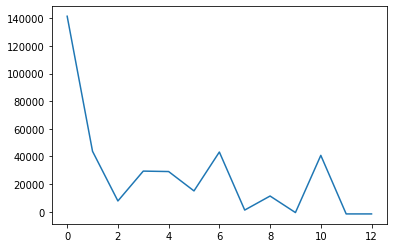

In [43]:
plt.plot(predictions)

### R-squared

In [44]:
lm.score(X_sig,Y)

0.9743428818517356

### Coeficients

In [45]:
lm.coef_

array([3.37961947e-07, 4.86999023e-12])

In [46]:
lm.intercept_

-2130.215863303012